<a href="https://colab.research.google.com/github/RYU-MCFLY/Aplicaciones-Financieras/blob/main/Copia_de_Semana5_1_Aps_Financieras5_Ruido_y_series_de_tiempoLUNES8MAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana5/1_Ruido_y_SeriesDeTiempo.ipynb)

# Dependencias

In [ ]:
import numpy as np
import pandas as pd

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

import matplotlib.pyplot as plt

# Función auxiliar

In [ ]:
def genera_puntos_regresion(m, b, sigma, size=10):
    '''genera coordenadas en x y y de puntos aleatorios
    en regresión.
    m: pendiente
    b: ordenada al origen
    sigma: desviación estándar de errores gaussianos
    size: cantidad de puntos a generar'''
    
    errors = 0
    xdata = np.linspace(-1.0,1.0,size)
    errors = np.random.normal(0, sigma, size) 
    ydata = m * xdata + b + errors

    return xdata, ydata

# Simulación de puntos en 2d a partir de la ecuación de una recta

## Sin Ruido 

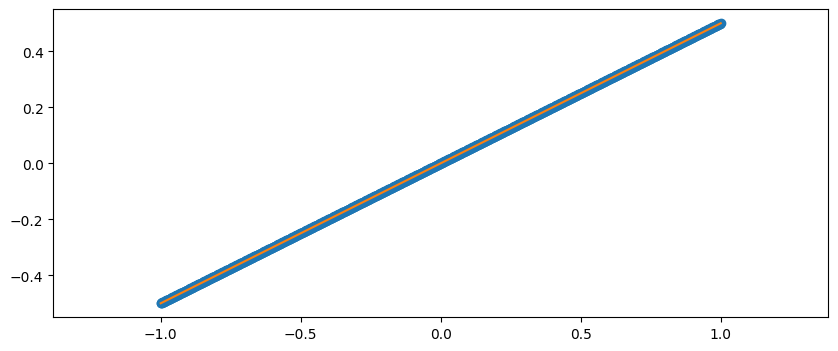

In [ ]:
m = 0.5
b = 0
sigma = 0

xs, ys = genera_puntos_regresion(m, b, sigma, size=1000)

fig = plt.figure(figsize = (10, 4))
plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)

plt.axis('equal')
plt.show()

## Con Ruido

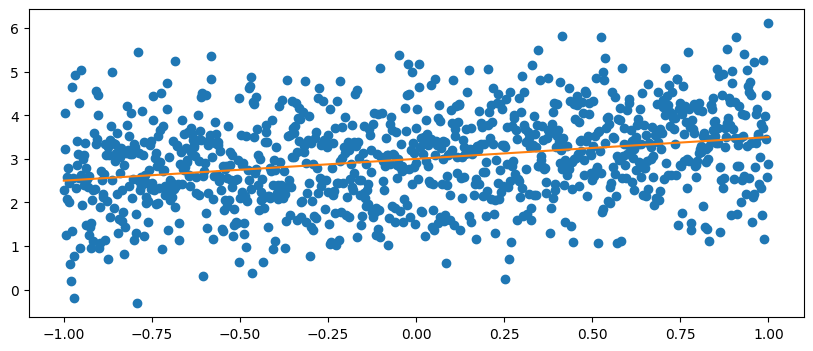

In [ ]:
m = 0.5
b = 3
sigma = 1

fig = plt.figure(figsize = (10, 4))
xs, ys = genera_puntos_regresion(m, b, sigma, size=1000)

plt.plot(xs, ys, 'o')
plt.plot(xs, m * xs + b)
plt.show()

<Axes: ylabel='Frequency'>

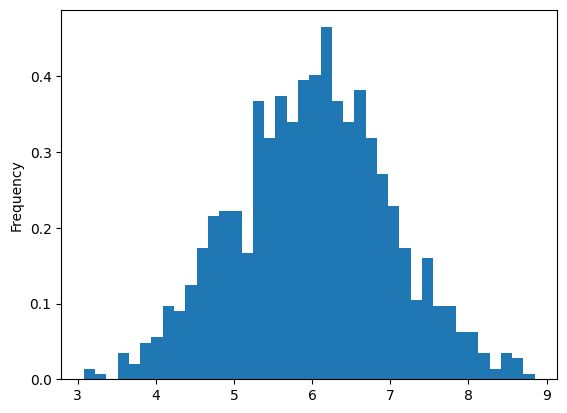

In [ ]:
errores = ys -  m * xs + b 
pd.Series(errores).plot.hist(bins=40, density = True)

# Simulación de Ruido blanco

### iid (independiente e identicamente distribuido)

In [ ]:
np.random.normal(0, 1, 10)

array([ 0.64643521, -1.37231384,  1.1208748 ,  0.693822  , -1.88202141,
        0.76755923, -0.100114  , -0.24759827,  0.16298402, -2.04608685])

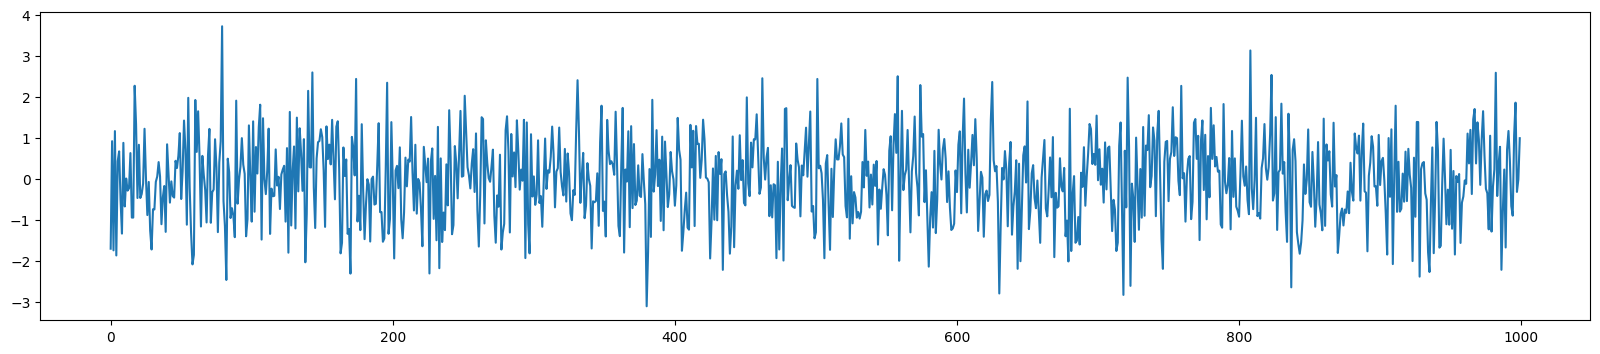

In [ ]:
media = 0
std = 1
num_muestras = 1000
ruido_blanco = pd.Series(np.random.normal(media, std, num_muestras))

ruido_blanco.plot(figsize = (20,4))
plt.show()

<Axes: ylabel='Frequency'>

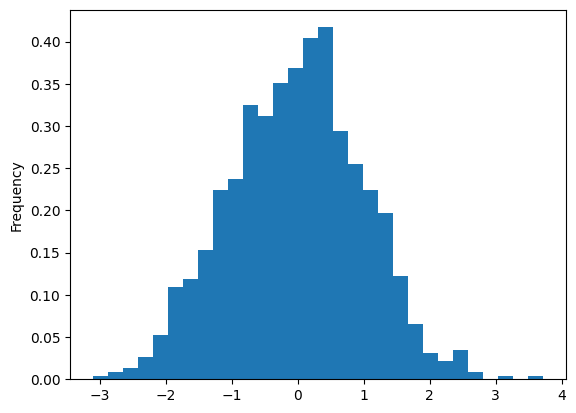

In [ ]:
ruido_blanco.plot.hist(bins=30, density=True)

### Otros tipos ruidos blancos

####Ejemplo 1 

1) Sea $X_t$ un proceso iid y $Y$ una variable aleatoria con distribución Bernoulli con $p = 0.05$

Entonces la variable aleatoria 

$Z_t= X_t~Y- X_t(Y-1)^2$ es un ruido blanco

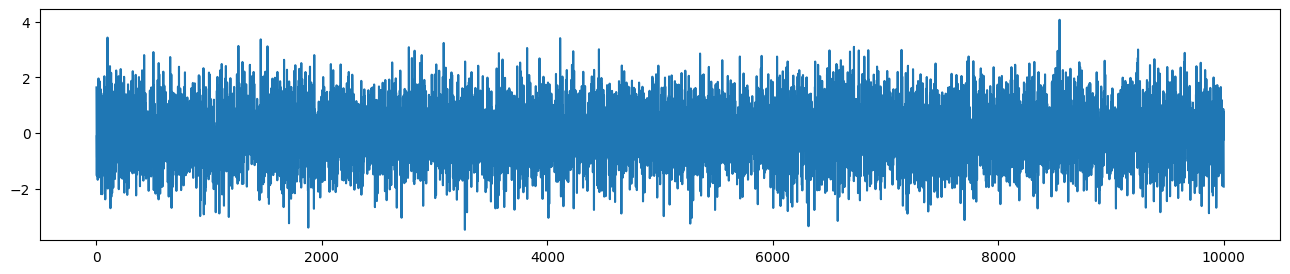

In [ ]:
num_muestras = 10000
X_t = pd.Series(np.random.normal(size= num_muestras))
Y = pd.Series(np.random.binomial(1, p = 0.05, size = num_muestras))
Z_t = (X_t * Y) - X_t*pow((Y - 1),2)

Z_t.plot(figsize = (16,3))
plt.show()

<Axes: ylabel='Frequency'>

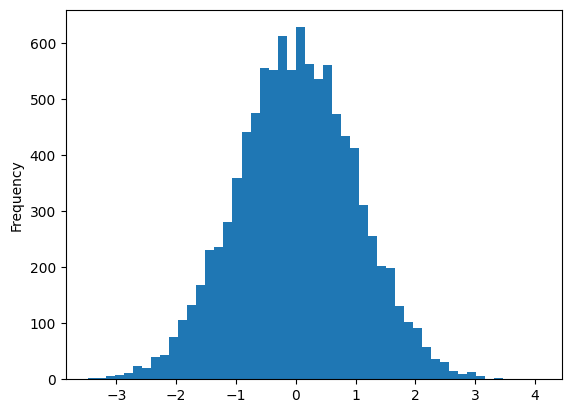

In [ ]:
Z_t.plot.hist(bins=50)

####Ejemplo 2

2) Sea $X_t$ un proceso iid y el proceso estocástico definido por:

- $Z_t = X_t$ cuando t es par, y 
- $Z_t = \frac{1}{\sqrt{2}}(X^2_{t-1}-1)$ cuando t es impar,

es un ruido blanco

In [ ]:
Xt = pd.Series(np.random.normal(size= 10000)) #proceso iid
Xt

0      -0.396889
1       0.201486
2       1.523733
3       1.368462
4       1.675098
          ...   
9995   -0.688176
9996   -0.757134
9997    0.746297
9998   -0.407076
9999    0.613970
Length: 10000, dtype: float64

In [ ]:
Zt = pd.Series(np.zeros(10000))
Zt

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Length: 10000, dtype: float64

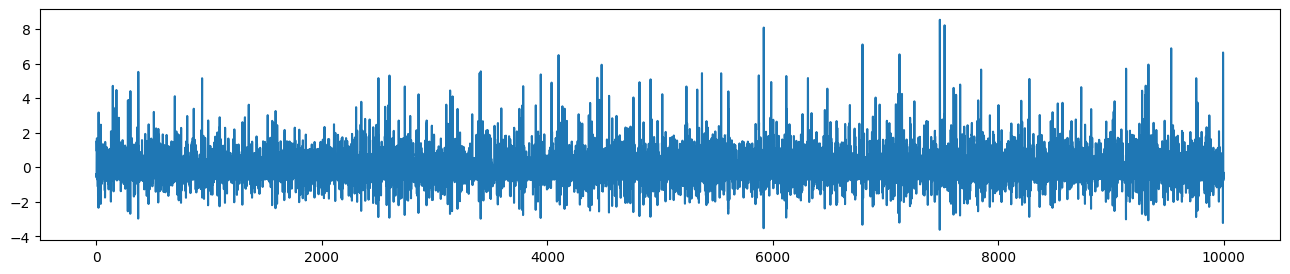

In [ ]:
Zt = pd.Series(np.zeros(10000))
for i in range(len(Zt)):
  if i % 2 == 0:
    Zt[i]= Xt[i]
  else:
    Zt[i] = 1/np.sqrt(2)*(pow(Xt[i-1], 2)-1)

Zt.plot(figsize = (16,3))
plt.show()

<Axes: ylabel='Frequency'>

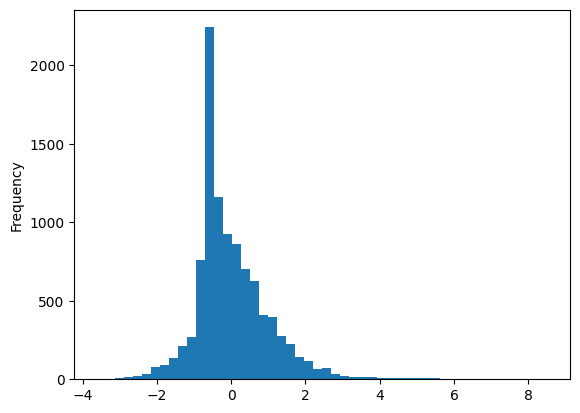

In [ ]:
Zt.plot.hist(bins=50)

## EJERCICIO: ¿Pueden pensar en un proceso que tenga como parte de el al ruido blanco, pero que no sea un ruido blanco?  
Es decir, $X_t$ es ruido blanco, pero
$$ f(X_t) $$
no es un ruido blanco.

$$ f(X_t) = 5t + X_t $$

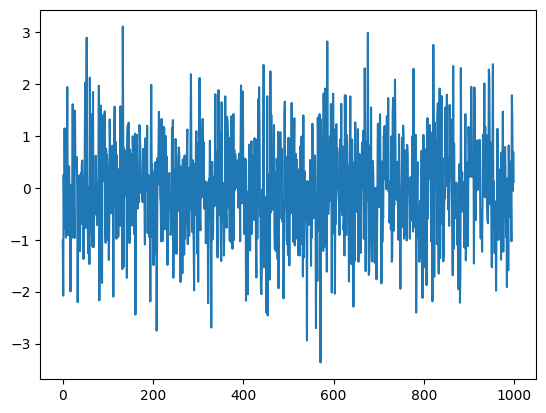

In [ ]:
ruido_blanco = np.random.normal(0,1,1000)
plt.plot(ruido_blanco)

In [ ]:
def funcion(ruido_blanco):
  '''transformacion'''
  x = np.linspace(0,10,len(ruido_blanco))
  y = 5*x + ruido_blanco
  return y

y_aux = funcion(ruido_blanco)

(array([ 68., 107., 112.,  94., 114., 104., 107., 110., 107.,  77.]),
 array([-2.02717058,  3.33391869,  8.69500795, 14.05609722, 19.41718649,
        24.77827576, 30.13936502, 35.50045429, 40.86154356, 46.22263283,
        51.58372209]),
 <BarContainer object of 10 artists>)

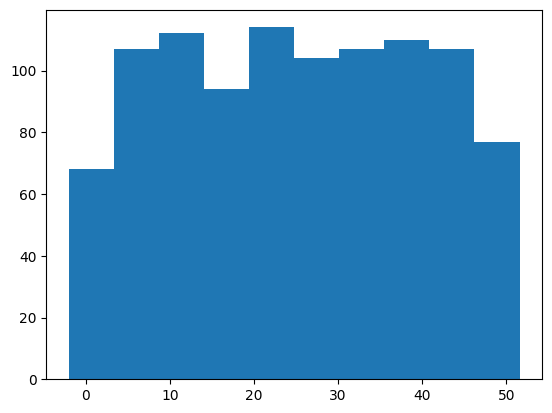

In [ ]:
plt.hist(y_aux)

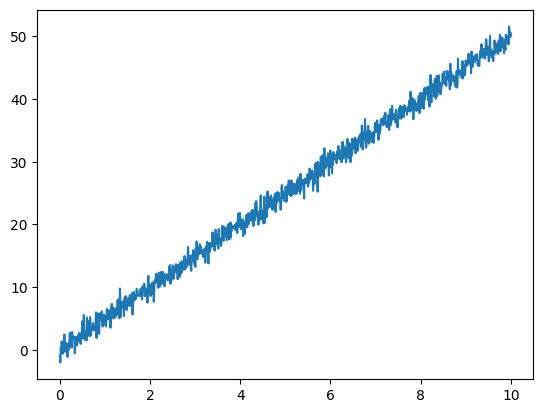

In [ ]:
plt.plot(np.linspace(0,10,len(ruido_blanco)), y_aux)

# Simulación de un proceso autorregresivo  (AR)

$$ x_t = \alpha_{(t-1)} x_{(t-1)} + \alpha_{(t-2)} x_{(t-2)} + \beta_{(t-1)} \epsilon_{(t-1)}$$ 

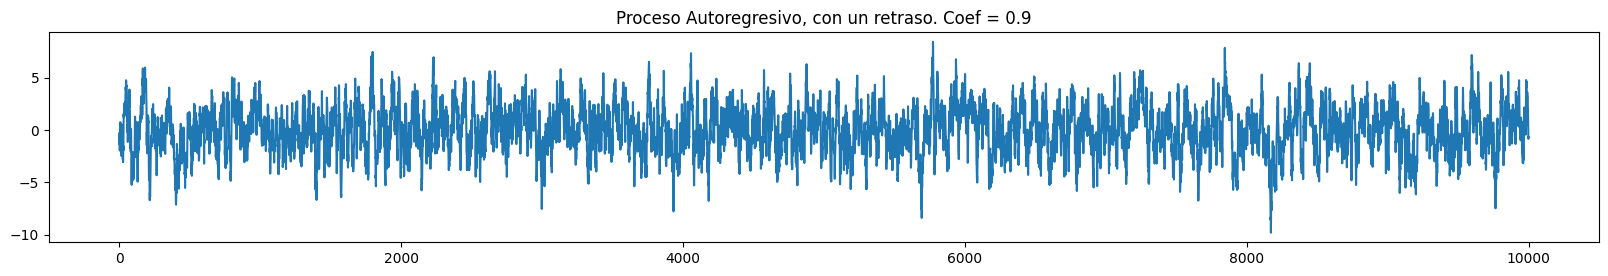

In [ ]:
coef = 0.9 
plt.subplot(2,1,1)
ar = np.array([1, - coef]) 
ma = np.array([1])

titulo = 'Proceso Autoregresivo, con un retraso. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=10000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

(array([  11.,  130.,  587., 1609., 2781., 2712., 1524.,  510.,  119.,
          17.]),
 array([-8.85357108, -7.10787016, -5.36216923, -3.6164683 , -1.87076737,
        -0.12506645,  1.62063448,  3.36633541,  5.11203634,  6.85773726,
         8.60343819]),
 <BarContainer object of 10 artists>)

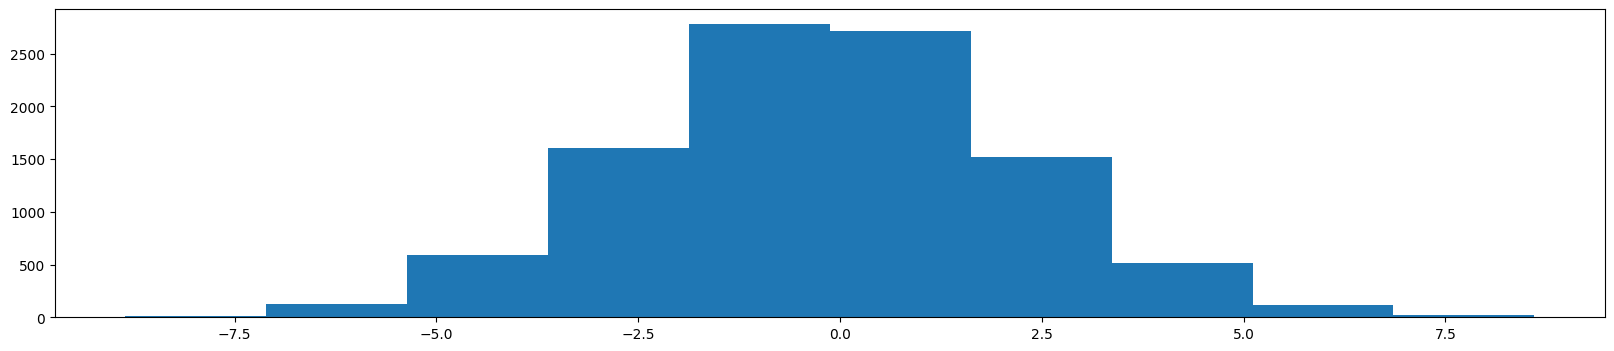

In [ ]:
plt.hist(AR_simulacion)

## Funciones de autocorrelación y autocorrelación parcial

## Paréntesis cultural: método .shift() en DataFrames

In [ ]:
muestra = pd.DataFrame({'Series_tiempo':[2,3,6,1,8,5,4,4,2,3,1]})
muestra

,Series_tiempo
0,2
1,3
2,6
3,1
4,8
5,5
6,4
7,4
8,2
9,3


In [ ]:
muestra['1_tiempo'] = muestra.shift()
muestra['2_tiempo'] = muestra.Series_tiempo.shift(2)

In [ ]:
muestra

,Series_tiempo,1_tiempo,2_tiempo
0,2,NaN,NaN
1,3,2.0,NaN
2,6,3.0,2.0
3,1,6.0,3.0
4,8,1.0,6.0
5,5,8.0,1.0
6,4,5.0,8.0
7,4,4.0,5.0
8,2,4.0,4.0
9,3,2.0,4.0


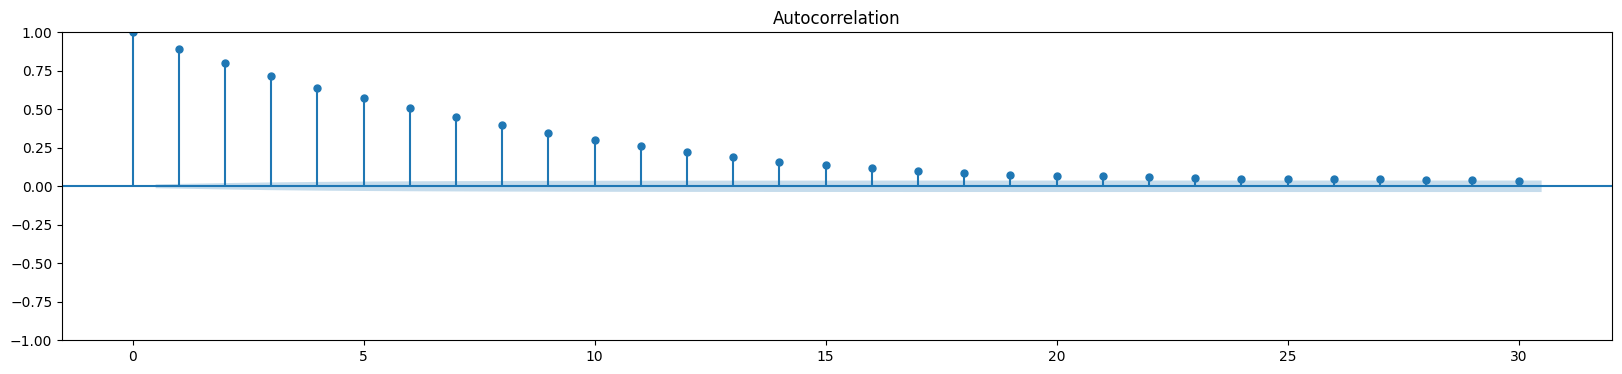

In [ ]:
# Función de autocorrelación
plot_acf(AR_simulacion,   alpha=0.2, lags=30)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


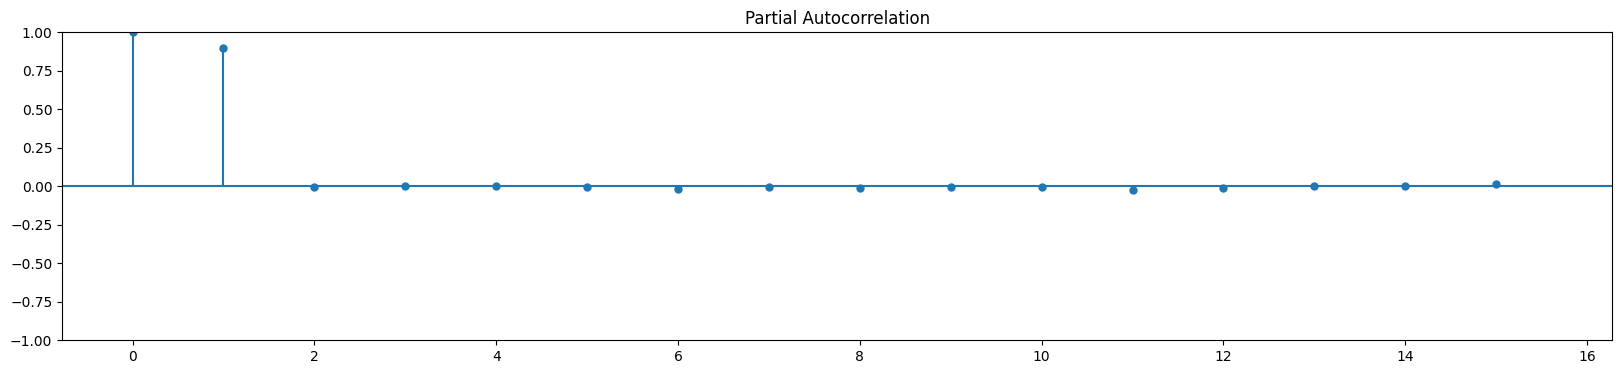

In [ ]:
# Función de autocorrelación parcial
plot_pacf(AR_simulacion, alpha=1, lags=15)
plt.show()

# Simulación de serie de tiempo Medias Móviles (MA)

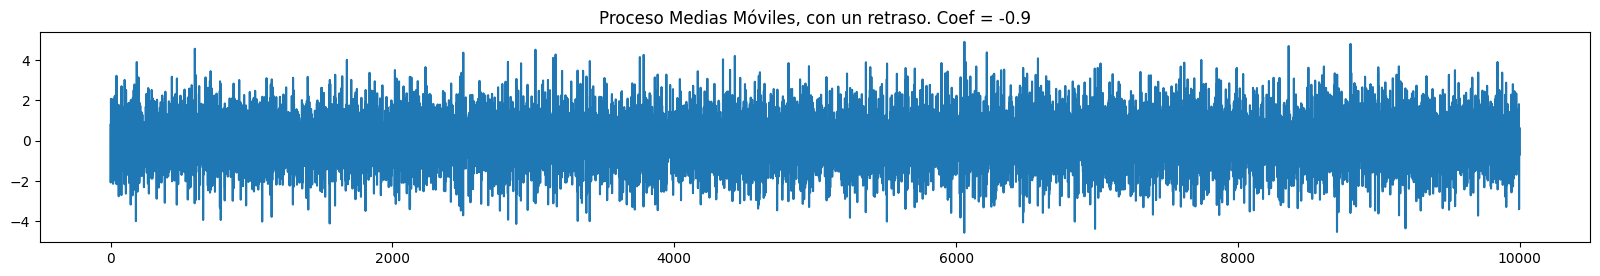

In [ ]:
coef = -0.9
plt.subplot(2,1,1)
ar = np.array([1]) 
ma = np.array([1, coef])

titulo = 'Proceso Medias Móviles, con un retraso. Coef = ' + str(coef)
MA_model = ArmaProcess(ar, ma)
MA_simulacion = pd.Series(MA_model.generate_sample(nsample=10000))
MA_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

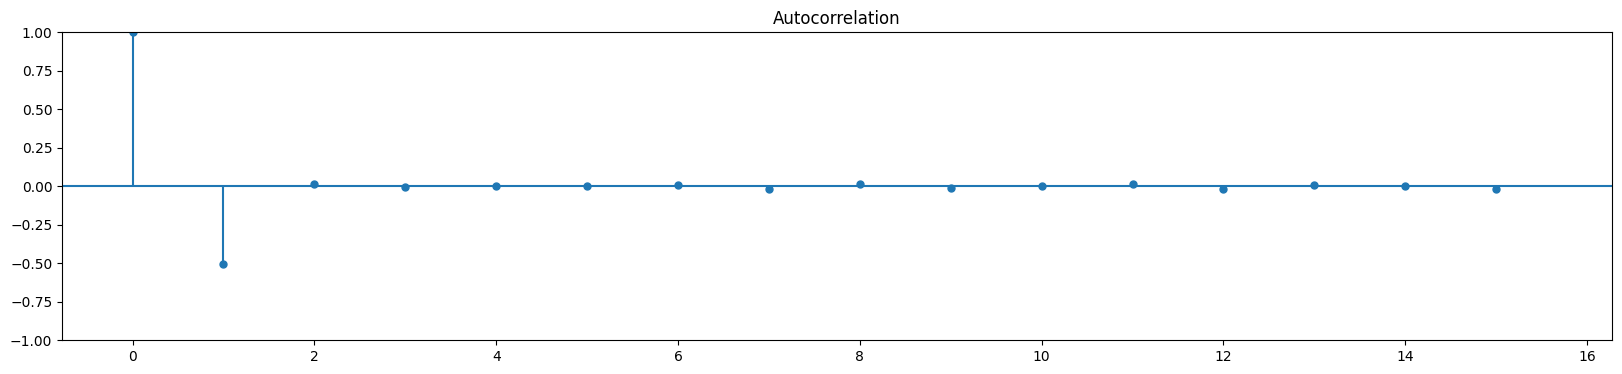

In [ ]:
# Función de autocorrelación
plot_acf(MA_simulacion, alpha=1, lags=15)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


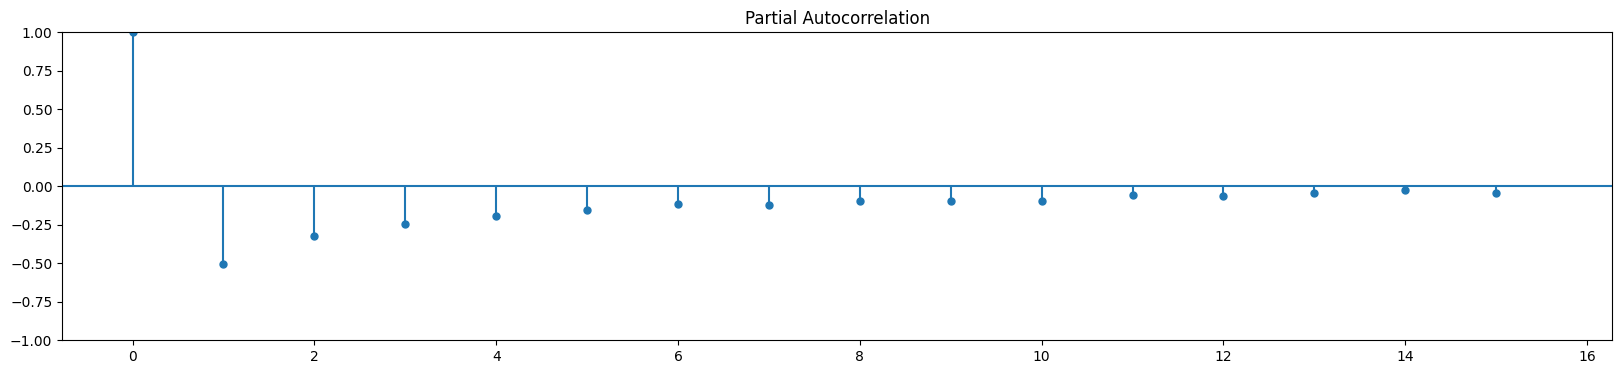

In [ ]:
plot_pacf(MA_simulacion, alpha=1, lags=15)
plt.show()

# Simulación proceso ARCH (manual)

Sea 
$\epsilon_t$ los terminos de errores, estos se componen de una parte estocástica y una parte dependiente en el tiempo de la desviación estandar $\sigma_t$, que luce del siguiente modo:
$$ \epsilon_t  = z_t \times \sigma_t$$
donde los $z_t$ son un ruido blanco.

Por otro lado, la serie de las desviaciones estándares se modela del siguiente modo:

$$ \sigma_{t}^{2} = \alpha_0 + \sum_{i=0}^{q} \alpha_i\cdot \epsilon_{t-i}^2 $$

en especial, si $q=1$ [es decir, ARCH(1)], tenemos

$$ \sigma_t^2 = \alpha_0  + \alpha_1 \cdot \epsilon_{t-1}^{2}$$.



https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity

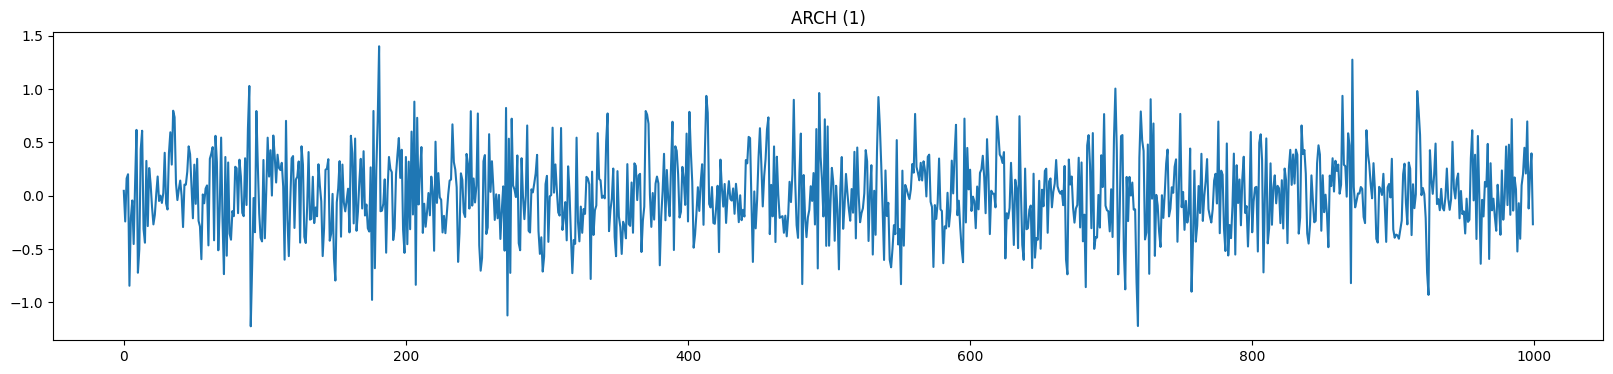

In [ ]:
#np.random.seed(1)

n=1000        # Num. de observaciones
n1=100        # Nos deharemos de estas primeras observaciones
n2=n+n1

a=(0.1,0.3)   # coeficientes alpha0 y alpha1 de modelo ARCH (1)
errors=np.random.normal(0,1,n2)
t=np.zeros(n2)
t[0]=np.random.normal(0,np.sqrt(a[0]/(1-a[1])),1)
for i in range(1,n2-1):
    t[i]=errors[i]*np.sqrt(a[0]+a[1]*t[i-1]**2)
    y=t[n1-1:-1] # eliminamos las primeras n1 observaciones

plt.title('ARCH (1)')
x=range(n)
plt.plot(x,y)
plt.show()